In [8]:
import warnings
warnings.filterwarnings('ignore')

import sqlite3
conn = sqlite3.connect("ss.db")
cur  = conn.cursor()

import time
import os

import pandas as pd

qry = """SELECT
bin_contents.BinNumber,
bin_contents.ID_Full,
bouncepoints_full.Event,
bouncepoints_full.Range,
bouncepoints_full.EvtDep,
snr.SNR
FROM bin_contents
LEFT JOIN bouncepoints_full 
ON bouncepoints_full.ID_Full=bin_contents.ID_Full
LEFT JOIN snr
ON bouncepoints_full.ID_Full=snr.ID_Full
WHERE bouncepoints_full.EvtDep < 50.0
ORDER BY bouncepoints_full.EvtDep
"""

dfds = pd.read_sql_query(qry, conn)

dfbins = pd.read_sql_query("SELECT * from bin_parameters", conn)
dfds

,BinNumber,ID_Full,Event,Range,EvtDep,SNR
0,2,C201009090728A.YP.NE71,C201009090728A,168.792201,12.0,3.561124
1,2,C201103111859A.ZG.CB2B,C201103111859A,148.852079,12.0,5.561808
2,2,C201106011255A.YP.NE81,C201106011255A,168.419292,12.0,3.418646
3,2,C201106011255A.YP.NEP7,C201106011255A,166.217833,12.0,3.395179
4,2,C201509070913A.SS.COI,C201509070913A,168.829123,12.0,3.338381
5,3,C201009090728A.YP.NE71,C201009090728A,168.792201,12.0,3.561124
6,3,C201103111859A.ZG.CB2B,C201103111859A,148.852079,12.0,5.561808
7,3,C201106011255A.YP.NE81,C201106011255A,168.419292,12.0,3.418646
8,3,C201106011255A.YP.NEP7,C201106011255A,166.217833,12.0,3.395179
9,3,C201509070913A.SS.COI,C201509070913A,168.829123,12.0,3.338381


In [9]:
def plot_location(bin_number):

    binparams = dfbins.query('index == %d' % bin_number)

    import numpy as np
    import matplotlib.pyplot as plt
    from mpl_toolkits.basemap import Basemap


    # Lambert Conformal Conic map.
    m = Basemap(llcrnrlon=-135.,llcrnrlat=0.,urcrnrlon=45.,urcrnrlat=61.,
                projection='lcc',lat_1=35.,lat_2=45.,lon_0=-100.,
                resolution ='l',area_thresh=1000.)
    names = []

    # draw coastlines, meridians and parallels.
    m.drawcoastlines()
    m.drawcountries()
    m.drawmapboundary(fill_color='#99ffff')
    m.fillcontinents(color='#cc9966',lake_color='#99ffff')
    m.drawparallels(np.arange(10,71,20),labels=[1,1,0,0])
    m.drawmeridians(np.arange(-180,0,20),labels=[0,0,0,1])

    x, y = m( np.array(binparams.Longitude), np.array(binparams.Latitude) )

    m.scatter(x, y, color='black', marker = 'o', s=1000, zorder = 10000)

    plt.title('Bin Location')

plt.style.use('ggplot')

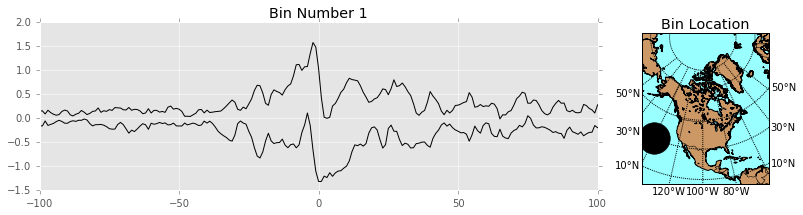

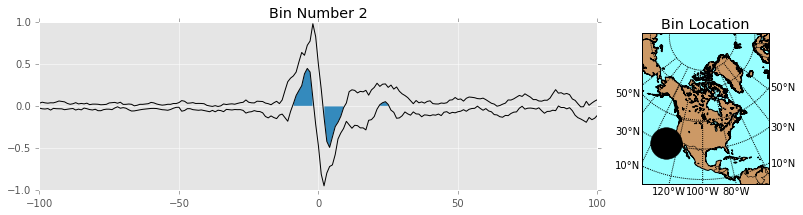

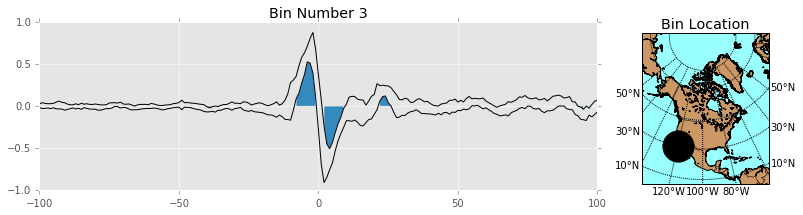

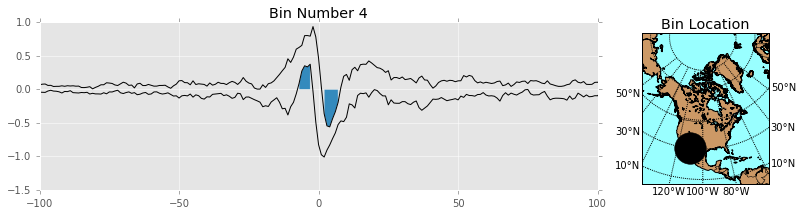

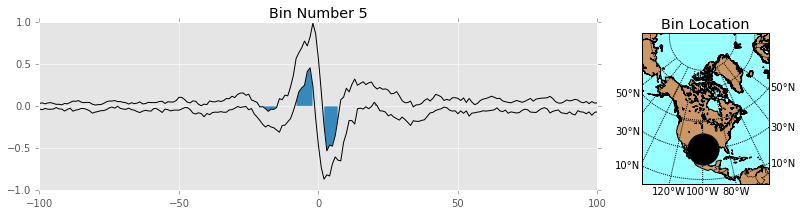

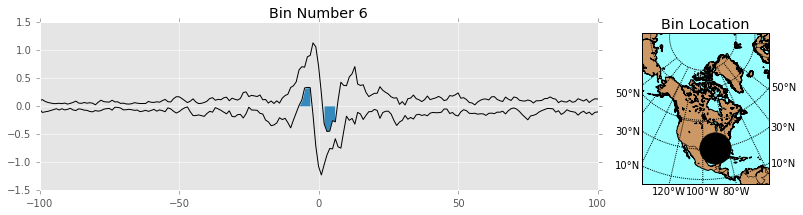

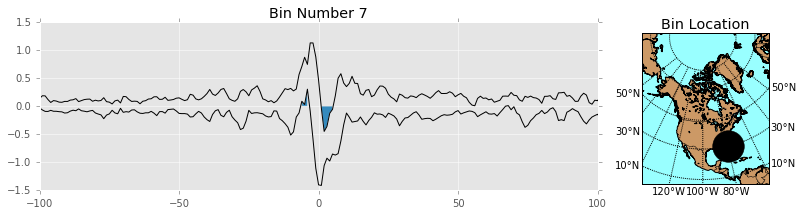

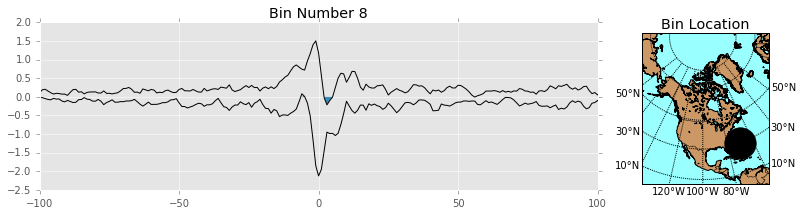

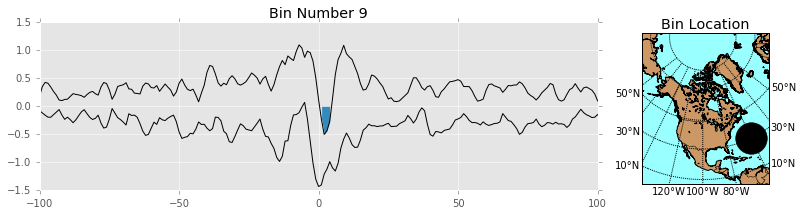

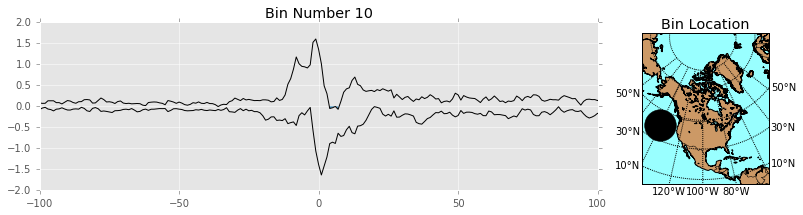

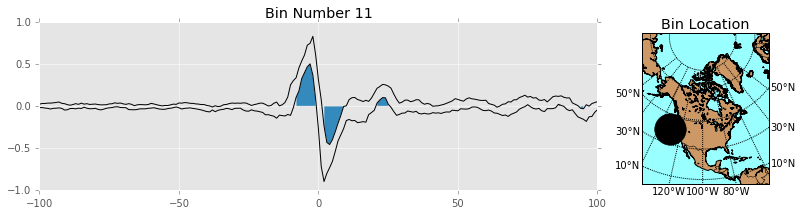

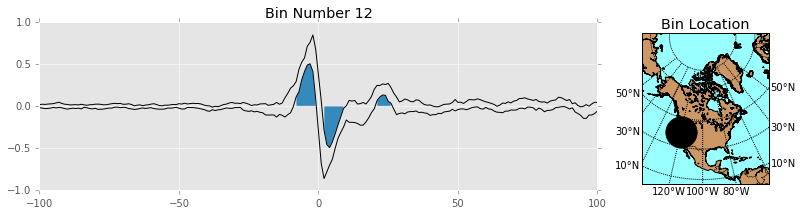

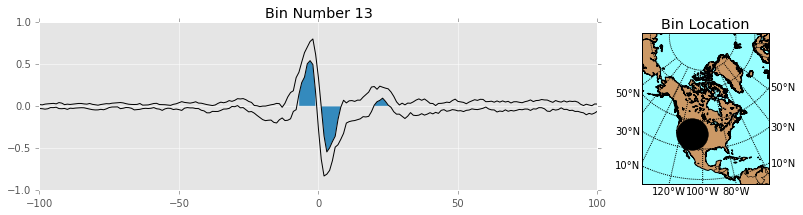

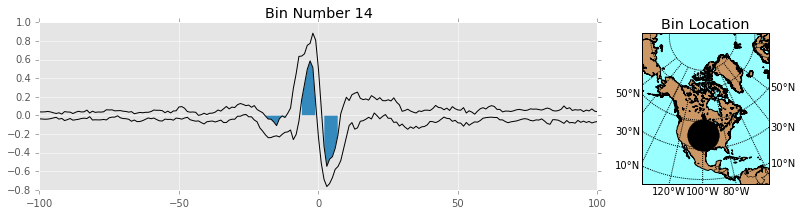

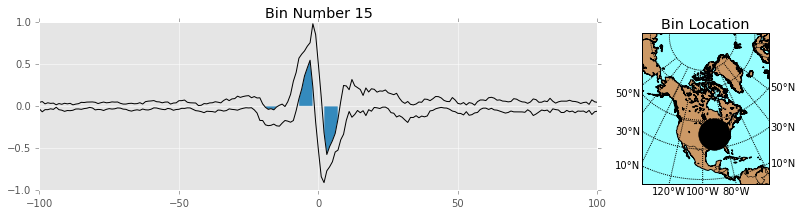

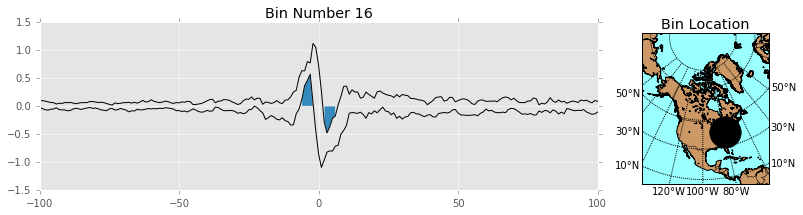

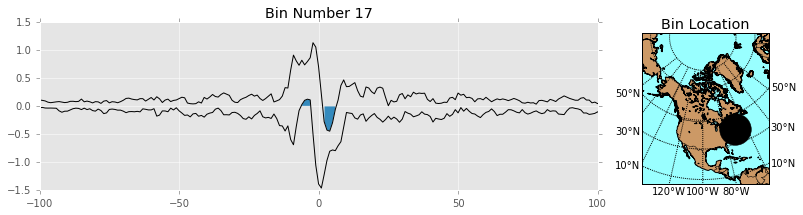

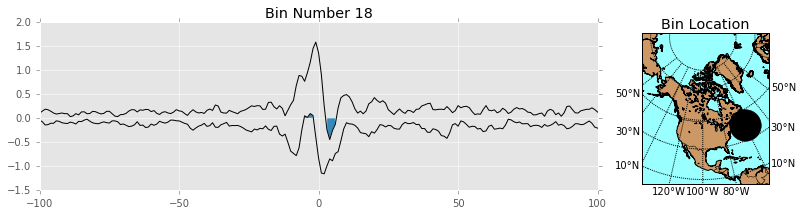

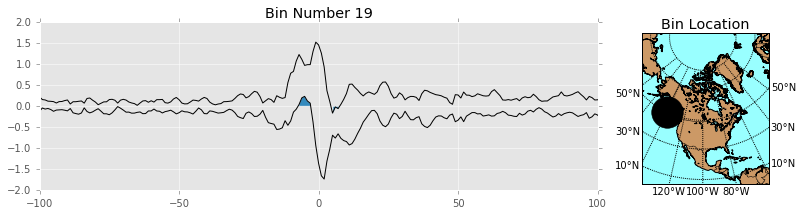

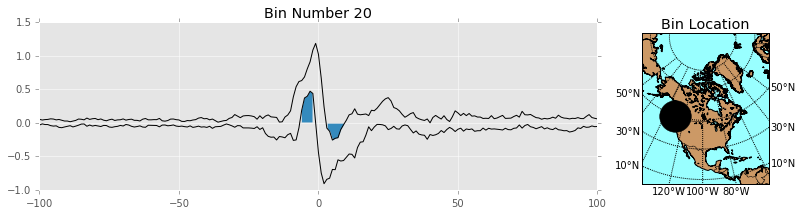

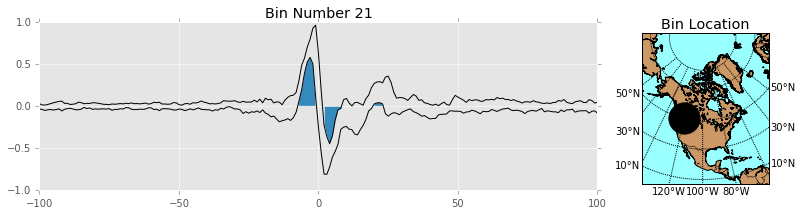

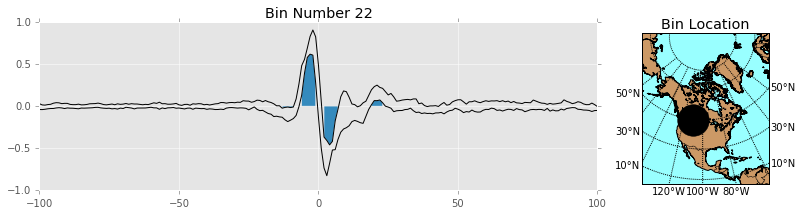

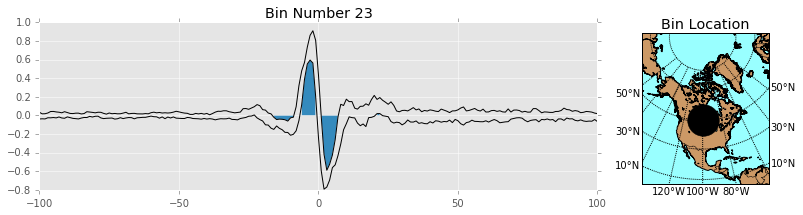

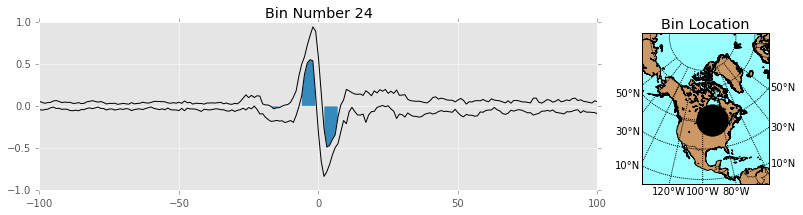

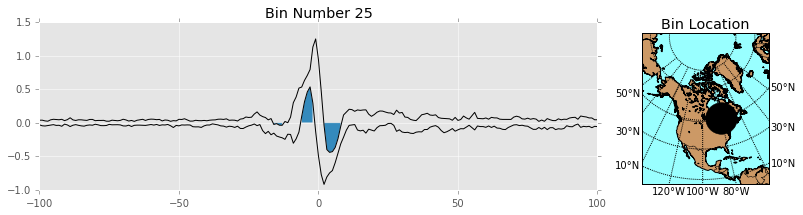

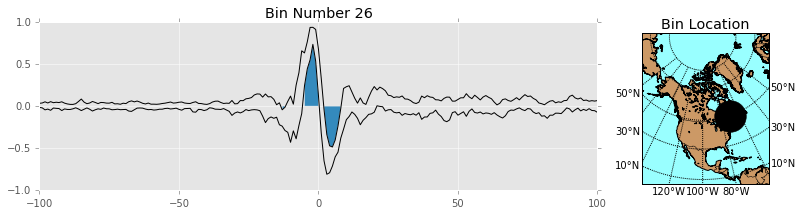

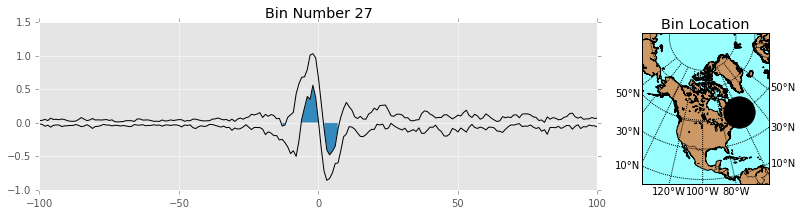

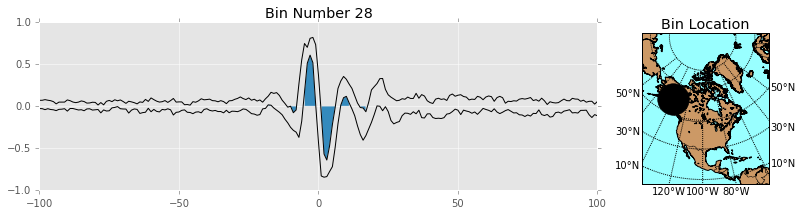

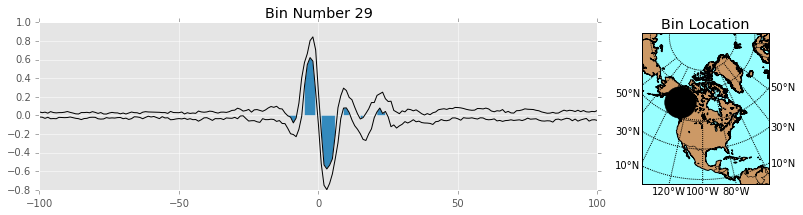

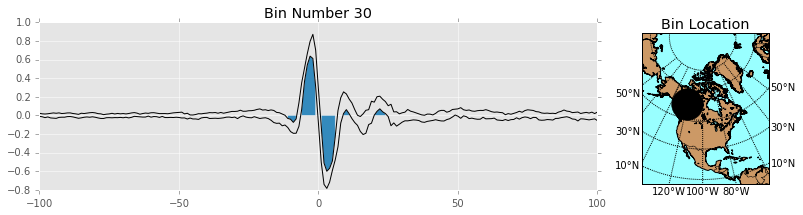

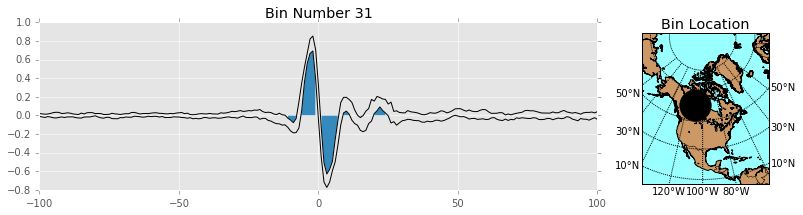

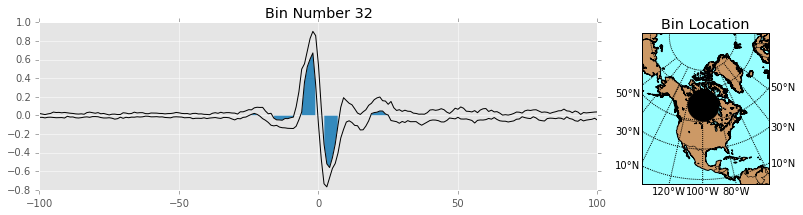

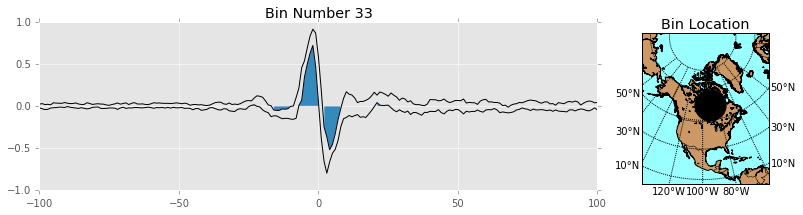

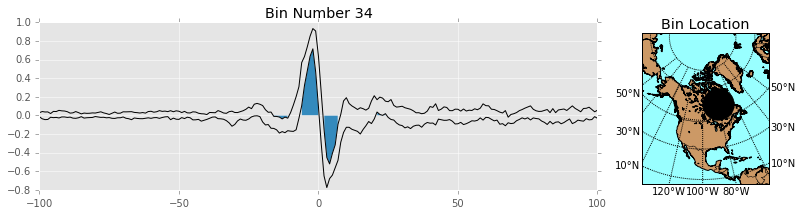

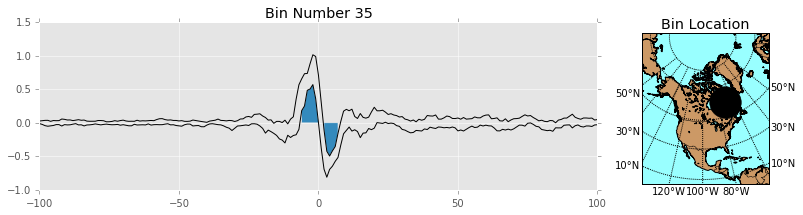

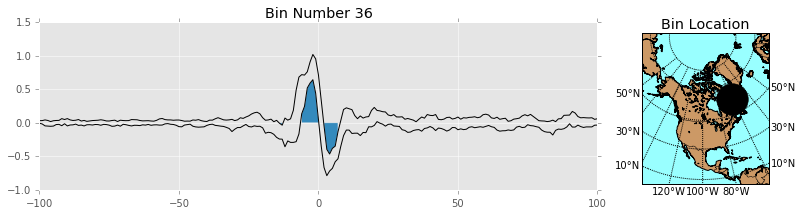

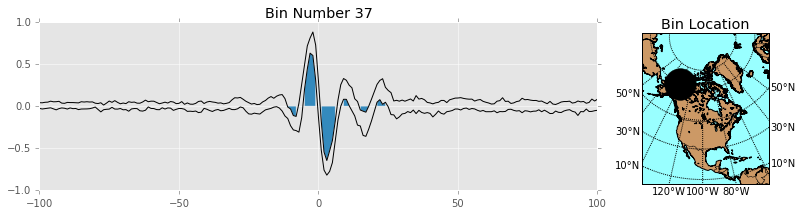

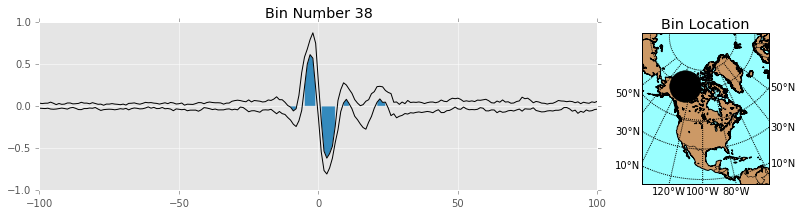

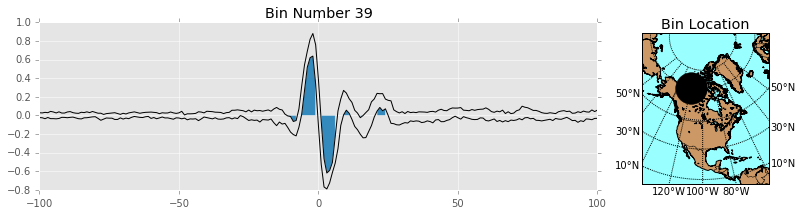

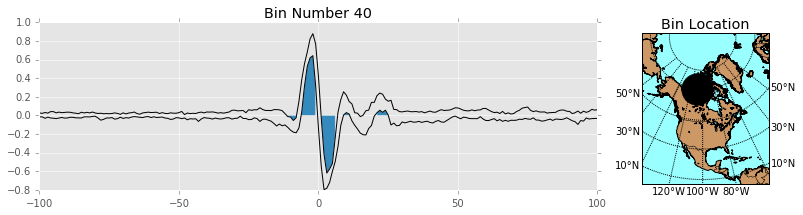

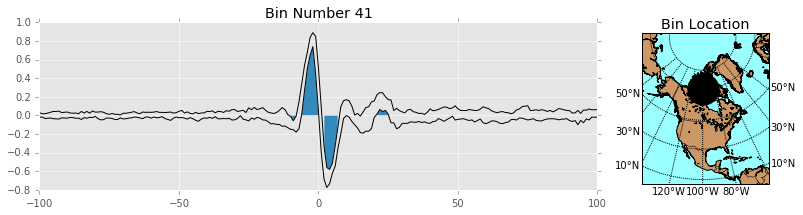

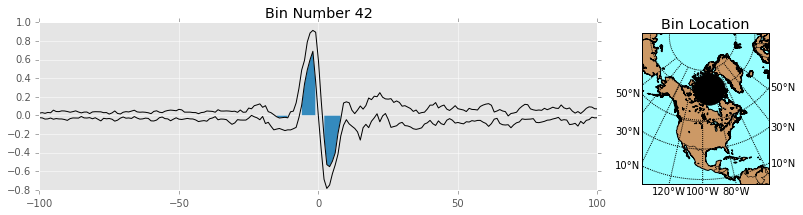

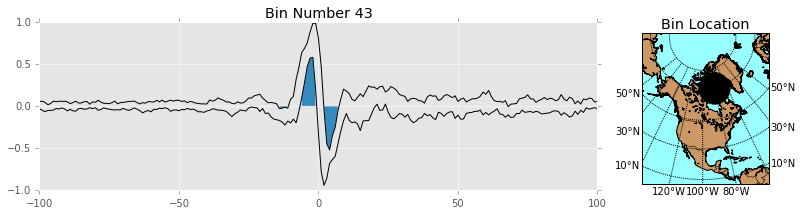

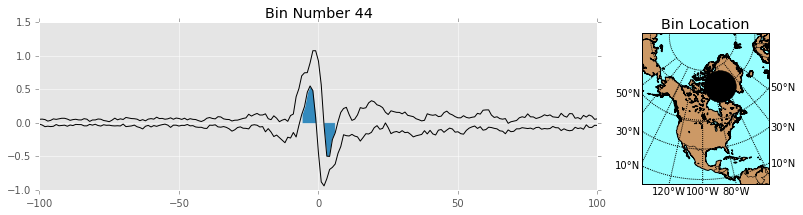

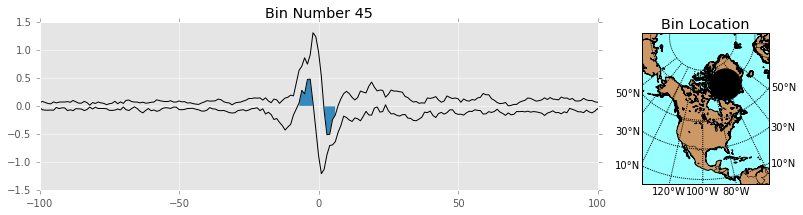

In [10]:
import obspy
from matplotlib import pylab as plt
from numpy import zeros, argmax, nan, sign, arange
from obspy.signal.filter import envelope
from scipy.signal import hilbert

for bin_number in sorted(dfds.BinNumber.unique()):
    dfbin = dfds.query("BinNumber == %d" % bin_number)

    st = obspy.Stream()
    
    npts = 800

    rbin = zeros(npts*len(dfbin)).reshape(npts,len(dfbin)) + nan

    for ii, row in enumerate(dfbin.iterrows()):
        bpindex = row[1].ID_Full
        directory = 'data/mseed/%s/' % row[1].Event
        filename = directory + bpindex + '.mseed'
        st0 = obspy.read(filename).detrend().taper(0.05)
        #st0.filter('bandpass',freqmin=0.01,freqmax=0.1,corners=4)
        st0.filter('lowpass',freq=0.1,corners=4)
        tr = st0[0]
        tr.data = hilbert(tr.data).imag
        imax = argmax(abs(envelope(tr.data)))
        norm = sign(tr.data[imax])*envelope(tr.data)[imax]
        if imax < 195 or imax > 240:    
            continue
        ishift = int(npts/2 - imax)
        rbin[ishift:ishift+len(tr.data),ii] = hilbert(-tr.data).imag/norm
        #rbin[ishift:ishift+len(tr.data),ii] = tr.data/norm

    #plt.imshow(rbin,aspect='auto',origin='lower')
    #plt.colorbar()
    #plt.show()

    from numpy import nanmean, nanmedian, nanstd
    from numpy.random import choice

    fig = plt.figure(1,figsize=(10,3))

    nboot = 100
    bbin = zeros(800*nboot).reshape(800,nboot) + nan

    for iboot in range(nboot):
        random_sample = choice(range(len(dfbin)), size = len(dfbin))
        bbin[:,iboot] = nanmedian(rbin[:,random_sample],axis=1)

    fmin=nanmean(bbin,axis=1)-4.*nanstd(bbin,axis=1)
    fmax=nanmean(bbin,axis=1)+4.*nanstd(bbin,axis=1)
        
    times = arange(len(fmin))*tr.stats.delta-npts/2
        
    #plt.plot(nanmean(bbin,axis=1))
    plt.plot(times,fmax,'k')
    plt.plot(times,fmin,'k')
    plt.fill_between(times,0,fmin, where=fmin>0)
    plt.fill_between(times,fmax,0, where=fmax<0)

    plt.xlim(-100,+100)
    plt.title('Bin Number %d' % bin_number)
    
    
    ax = fig.add_axes([0.8, 0.15, 0.5, 0.7])
    plot_location(bin_number)
    
    plt.show()